In [6]:
pip install solara

In [18]:
import solara

@solara.component
def Page():
    name, set_name = solara.use_state("Happy")  # Unpack tuple correctly
    solara.InputText("Enter your name:", value=name, on_value=set_name)  # Bind state updates
    solara.Button("Greet", on_click=lambda: print(f"Hello, {name}!"))
    solara.Text(f"Hello, {name}!")

solara.display(Page())


Cannot show ipywidgets in text

Cannot show ipywidgets in text

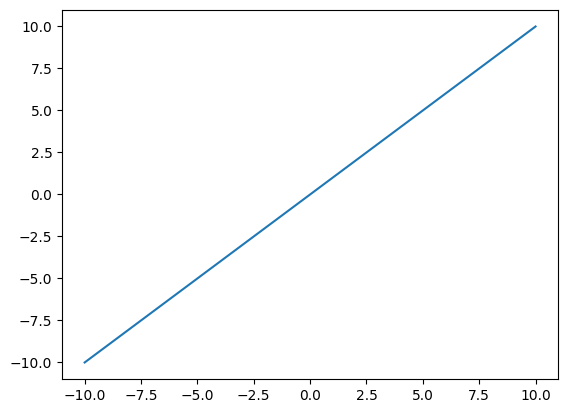

In [14]:
import solara
import matplotlib.pyplot as plt
import numpy as np

@solara.component
def Page():
    a, set_a = solara.use_state(1.0)
    b, set_b = solara.use_state(0.0)

    x = np.linspace(-10, 10, 100)
    y = a * x + b

    fig, ax = plt.subplots()
    ax.plot(x, y)
    solara.FigureMatplotlib(fig)

    solara.SliderFloat("Slope (a)", value=a, min=-5, max=5, on_value=set_a)
    solara.SliderFloat("Intercept (b)", value=b, min=-5, max=5, on_value=set_b)

solara.display(Page())


In [20]:
@solara.component
def ThemeToggle():
    dark_mode, set_dark_mode = solara.use_state(False)  # ✅ State for dark mode

    solara.Button("Toggle Theme", on_click=lambda: set_dark_mode(not dark_mode))  # ✅ Toggle theme
    if dark_mode:
        solara.Text("🌙 Dark Mode Activated", style={"color": "white", "background": "black", "padding": "10px"})
    else:
        solara.Text("☀ Light Mode Activated", style={"color": "black", "background": "yellow", "padding": "10px"})

ThemeToggle()


Cannot show ipywidgets in text

In [21]:
@solara.component
def TodoApp():
    tasks, set_tasks = solara.use_state([])  # ✅ Store tasks as a list
    new_task, set_new_task = solara.use_state("")  # ✅ Store new task input

    def add_task():
        if new_task.strip():
            set_tasks(tasks + [new_task])  # ✅ Add new task to list
            set_new_task("")  # ✅ Clear input after adding

    solara.InputText("New Task", value=new_task, on_value=set_new_task)  # ✅ Input box
    solara.Button("Add Task", on_click=add_task)  # ✅ Add task button

    for task in tasks:
        solara.Text(f"✔ {task}")  # ✅ Display each task

TodoApp()


Cannot show ipywidgets in text

In [25]:
@solara.component
def Counter():
    count, set_count = solara.use_state(0)  # ✅ Initialize count as 0
    
    solara.Text(f"Count: {count}")  # ✅ Display count
    solara.Button("Increase", on_click=lambda: set_count(count + 1))  # ✅ Increment count on click

Counter()

Cannot show ipywidgets in text

In [33]:
import solara
import random

jokes = [
    "Why don't programmers like nature? It has too many bugs.",
    "How do you comfort a JavaScript bug? You console it.",
    "Why do Python programmers prefer dark mode? Because light attracts bugs!"
]

@solara.component
def Page():
    joke, set_joke = solara.use_state("Click the button to get a joke!")  # ✅ Correctly unpack state

    def get_joke():
        set_joke(random.choice(jokes))  # ✅ Use set_joke() to update state

    solara.Text(joke, style="font-size: 18px; font-weight: bold;")  # ✅ Use 'joke' directly
    solara.Button("Tell me a joke", on_click=get_joke)

solara.display(Page())  # ✅ Use Page() instead of Page


Cannot show ipywidgets in text

Cannot show ipywidgets in text

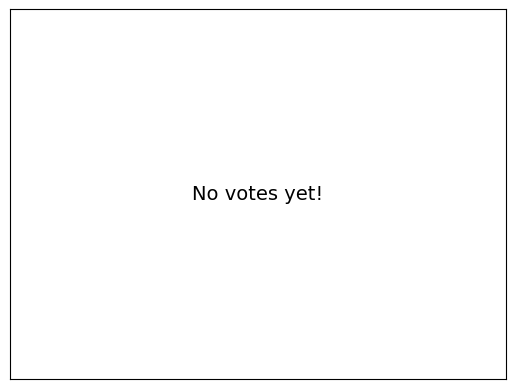

In [40]:
import solara
import matplotlib.pyplot as plt
import numpy as np

@solara.component
def Page():
    options = ["Python", "JavaScript", "C++", "Java"]
    votes = {option: solara.use_state(0) for option in options}  # ✅ Define state inside component

    def vote(option):
        votes[option][1](votes[option][0] + 1)  # ✅ Correct state update

    labels = list(votes.keys())
    sizes = [votes[option][0] for option in options]  # ✅ Extract values properly

    # ✅ Avoid error: Ensure pie chart has at least one non-zero value
    if sum(sizes) == 0:
        fig, ax = plt.subplots()
        ax.text(0.5, 0.5, "No votes yet!", fontsize=14, ha="center", va="center")
        ax.set_xticks([])  # Hide axes
        ax.set_yticks([])
    else:
        fig, ax = plt.subplots()
        ax.pie(sizes, labels=labels, autopct="%1.1f%%")

    solara.FigureMatplotlib(fig)

    for option in options:
        solara.Button(f"Vote for {option}", on_click=lambda opt=option: vote(opt))  # ✅ Fix lambda issue

solara.display(Page())  # ✅ Correct for Jupyter